In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data in

In [19]:
df_ei_i = pd.read_csv('events_info.csv')
df_ei = df_ei[['Event Name', 'Date', 'Location', 'Attendance']]
df_ei.head(2)

,Event Name,Date,Location,Attendance
0,UFC 234: Adesanya vs. Silva,02/09/2019,"Melbourne, Victoria, Australia",15238.0
1,UFC Fight Night: Assuncao vs. Moraes 2,02/02/2019,"Fortaleza, Ceara, Brazil",10040.0


In [18]:
df_ef_i = pd.read_csv('events_fights.csv')
df_ef = df_ef_i[['Event Name', 'Winner', 'Loser', 'Weight Class']]
df_ef.head(2)

,Event Name,Winner,Loser,Weight Class
0,UFC 234: Adesanya vs. Silva,Israel Adesanya,Anderson Silva,Middleweight
1,UFC 234: Adesanya vs. Silva,Lando Vannata,Marcos Mariano,Lightweight


In [22]:
df_fi_i = pd.read_csv('fighters_info.csv')
df_fi = df_fi_i[['Name', 'Nickname', 'Record', 'Height', 'Weight', 'Reach','Stance', 'DOB', 'SLpM', 'Str_Acc', 'SApM', 'Str_Def', 'TD_Avg','TD_Acc', 'TD_Def', 'Sub. Avg']]
df_fi.head(2)

,Name,Nickname,Record,Height,Weight,Reach,Stance,DOB,SLpM,Str_Acc,SApM,Str_Def,TD_Avg,TD_Acc,TD_Def,Sub. Avg
0,Israel Adesanya,The Last Stylebender,16-0-0,76,185,80,Switch,07/22/1989,4.47,53,2.07,69,0.00,0,85,0.2
1,Anderson Silva,The Spider,34-9-0,74,185,77,Southpaw,04/14/1975,3.06,62,1.96,61,0.53,77,69,0.8


In [23]:
df_ff_i = pd.read_csv('fighters_fights.csv')
df_ff = df_ff_i[['f1', 'f2', 'Event', 'Date', 'f1.result', 'f1.str','f2.str', 'f1.td', 'f2.td', 'f1.sub', 'f2.sub', 'f1.pass', 'f2.pass','Method', 'Round', 'Time']]
df_ff.head(2)

,f1,f2,Event,Date,f1.result,f1.str,f2.str,f1.td,f2.td,f1.sub,f2.sub,f1.pass,f2.pass,Method,Round,Time
0,Israel Adesanya,Anderson Silva,UFC 234: Adesanya vs. Silva,02/09/2019,win,65,31,0,0,0,0,0,0,U-DEC,3,300
1,Israel Adesanya,Derek Brunson,UFC 230: Cormier vs. Lewis,11/03/2018,win,13,3,0,0,0,0,0,0,KO/TKO,1,291


# General Stats

## From events info

In [24]:
df_ei.head()

,Event Name,Date,Location,Attendance
0,UFC 234: Adesanya vs. Silva,02/09/2019,"Melbourne, Victoria, Australia",15238.0
1,UFC Fight Night: Assuncao vs. Moraes 2,02/02/2019,"Fortaleza, Ceara, Brazil",10040.0
2,UFC Fight Night: Cejudo vs. Dillashaw,01/19/2019,"Brooklyn, New York, USA",12152.0
3,UFC 232: Jones vs. Gustafsson 2,12/29/2018,"Los Angeles, California, USA",15862.0
4,UFC Fight Night: Lee vs. Iaquinta,12/15/2018,"Milwaukee, Wisconsin, USA",9010.0


In [56]:
df_ei['Date'] = pd.to_datetime(df_ei['Date'])
df_ei.head(2)

,Event Name,Date,Location,Attendance
0,UFC 234: Adesanya vs. Silva,2019-02-09,"Melbourne, Victoria, Australia",15238.0
1,UFC Fight Night: Assuncao vs. Moraes 2,2019-02-02,"Fortaleza, Ceara, Brazil",10040.0


In [59]:
df_ei_nz = df_ei[df_ei.Attendance > 0 ]

In [84]:
df_ei_early = df_ei_nz[df_ei_nz.Date < '2003-01-01']
df_ei_middle = df_ei_nz[(df_ei_nz.Date > '2003-01-01') & (df_ei_nz.Date < '2013-01-01')]
df_ei_recent = df_ei_nz[df_ei_nz.Date > '2013-01-01']

### Evolution of events' attendance

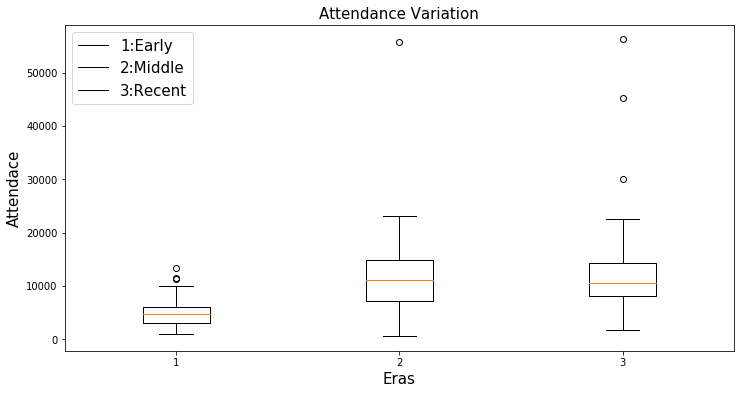

In [198]:
fig, ax = plt.subplots(figsize= (12,6))
#ax.hist(df_ei_nz['Attendance'], bins = 100)
ax.set_title("Attendance Variation", fontsize =15)
ax.set_ylabel("Attendace", fontsize =15)
ax.set_xlabel("Eras", fontsize =15)
ax.boxplot([df_ei_early.Attendance, df_ei_middle.Attendance, df_ei_recent.Attendance])
ax.legend(['1:Early', '2:Middle', '3:Recent'], fontsize =15)

fig.show()

In [94]:
df_test = df_ei

In [96]:
df_test['Country'] = df_test.Location.map(lambda x :x.split(',')[-1])

In [187]:
df_ct = df_test.groupby(by='Country').count()
df_ct.head(2)

,Event Name,Date,Location,Attendance
Country,,,,
Argentina,1,1,1,1
Australia,14,14,14,14


No handles with labels found to put in legend.


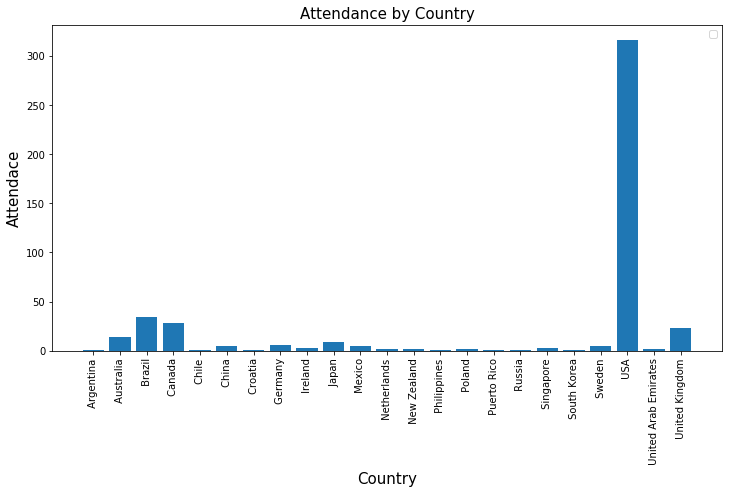

In [194]:
fig, ax = plt.subplots(figsize= (12,6))
ax.bar(df_ct.index, df_ct.Date)
ax.set_title("Attendance by Country", fontsize = 15)
ax.set_ylabel("Attendace", fontsize = 15)
ax.set_xlabel("Country", fontsize = 15)
plt.xticks(df_ct.index, rotation='vertical')
ax.legend()
fig.show()

In [182]:
df_n_us = df_test[df_test['Country'] != ' USA']
df_n_us = df_n_us.groupby(by='Country').count()
n = df_n_us.sort_values(by="Date", ascending=False)

No handles with labels found to put in legend.


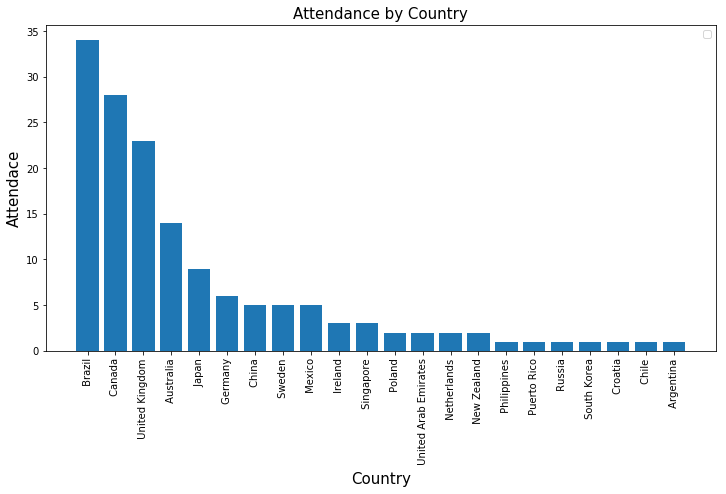

In [193]:
fig, ax = plt.subplots(figsize= (12,6))
ax.bar(n.index, n.Date)
ax.set_title("Attendance by Country", fontsize = 15)
ax.set_ylabel("Attendace", fontsize = 15)
ax.set_xlabel("Country", fontsize = 15)
plt.xticks(n.index, rotation='vertical')
ax.legend()
fig.show()